# INFO284 Machine Learning Eksamen, vår 2021

Kanditater:
- 148
- 145
- 123
- 176
---

## Kommandoer for å importere nødvendige pakker 
* <span style='background:black'> <span style='color:white'> pip install numpy </span>
    
    
* <span style='background:black'> <span style='color:white'> pip install pandas </span>
    
    
* <span style='background:black'> <span style='color:white'> pip install pandas-profiling </span>
    
    
* <span style='background:black'> <span style='color:white'> pip install sklearn </span>
    
    
* <span style='background:black'> <span style='color:white'> pip install seaborn </span>
    
    
* <span style='background:black'> <span style='color:white'> pip install matplotlib </span>
    

* <span style='background:black'> <span style='color:white'> pip install jupyter </span>

## Analyse av datasett

In [1]:
# Import
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import sklearn

#Plotting 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 50) # Viser alle kolonner
pd.options.mode.use_inf_as_na = True 
pd.options.mode.chained_assignment = None  

# Importerer datasett Pandas DataFrame
df = pd.read_csv('nyc-rolling-sales.csv', delimiter=',', skipinitialspace=' ')  # Hopper over mellomrom etter delimiter
df.head()  

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,NaN,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,NaN,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,NaN,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,NaN,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,NaN,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
print("Antall kolonner:", df.shape[0])
print("Antall rader:   ", df.shape[1])

Antall kolonner: 84548
Antall rader:    22


In [4]:
print("Prosentandel null eller na for features:")
((df.isna() | df.isnull()).sum() * 100 / df.index.size).round(2)

Prosentandel null eller na for features:


Unnamed: 0                          0.00
BOROUGH                             0.00
NEIGHBORHOOD                        0.00
BUILDING CLASS CATEGORY             0.00
TAX CLASS AT PRESENT                0.87
BLOCK                               0.00
LOT                                 0.00
EASE-MENT                         100.00
BUILDING CLASS AT PRESENT           0.87
ADDRESS                             0.00
APARTMENT NUMBER                   77.47
ZIP CODE                            0.00
RESIDENTIAL UNITS                   0.00
COMMERCIAL UNITS                    0.00
TOTAL UNITS                         0.00
LAND SQUARE FEET                    0.00
GROSS SQUARE FEET                   0.00
YEAR BUILT                          0.00
TAX CLASS AT TIME OF SALE           0.00
BUILDING CLASS AT TIME OF SALE      0.00
SALE PRICE                          0.00
SALE DATE                           0.00
dtype: float64

In [5]:
# Fjerner features med store mengder nullverdier + indeksering
del df['EASE-MENT']
del df['APARTMENT NUMBER']
del df['Unnamed: 0'] 

df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


---
Ved bruk av **Pandas ProfileReport** kan vi inspisere datasettet nærmere.

In [6]:
profile = ProfileReport(df, minimal=True)
profile.to_notebook_iframe()

--- 
**Observasjon**:

Her observerer vi følgende:

- **Land Square Feet, Gross Square Feet og Sale Price**:

    - Er angitt som kategoriske datatyper, men burde være numeriske ettersom de holder på tallverdier.
    
    - Bindestrek og 0 er de *to vanligste* verdiene for nevnte features.
   
   
 
 
- **Zip Code og Year Built**:
   - Har små mengder med 0. Ikke gyldig verdi for disse. 
 
 
 

- **Residential, Commerical og Total Units**:
    - Har også mendger med 0, *men* vi mener det er en gyldig verdi
    
    - En eiendom kan ha 0 Commerical eller Residential Units,
      og 0 Total Units tolker vi som en tomt uten boligenhet
    
    
    
- **Buildig Class At Present og Buildig Class At Time of Sale**     
    - Her kan vi droppe én av de siden de holder på (mye av) de samme verdiene .
   
  
    
- **Neighborhood og Address:**
    - Har høy kardinalitet, dvs. mange distinkte verdier. 
    - Dette er ikke optimalt for kategoriske features, da vi ønsker å ha et begrenset antall kategorier for eiendommer. 
    - Vi vil komme tilbake til hva vi skal gjøre med disse featurene.


I første omgang vil vi gjøre alle verdier som kan tolkes som manglende verdier om til **NaN**,
slik at datasettet har én felles nullverdi. 

--- 

# Preprosessering

### Sletting av duplikater og nullverdier

In [7]:
 # Dropper identiske rader i DataFrame 
print("Dropper", sum(df.duplicated()), "duplikerte rader")

df = df.drop_duplicates() 

Dropper 765 duplikerte rader


In [8]:
# Finner identiske verdier for Buidling Class-rader
print("Prosentandel rader hvor Building Class er lik:")

(df.duplicated(['BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT']).sum() * 100 / df.index.size).round(2)

Prosentandel rader hvor Building Class er lik:


99.64

In [9]:
# Dropper Buidling Class At Present 
del df['BUILDING CLASS AT PRESENT']

In [10]:
# Utvalgte features med manglende verdier 
null_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'ZIP CODE', 'YEAR BUILT']  

# Itererer hver feature og caster om gitt verdi til NaN i DataFrame
for col in null_columns:
    df[col] = df[col].replace(r'[-]', np.nan, regex=True)  # Bindestrek 
    df[col] = df[col].replace(r'^0$', np.nan, regex=True)  # 0 i stringform 
    df[col] = df[col].replace(0, np.nan)  # 0 i tallform

df.sample(4)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
79164,5,GRYMES HILL,02 TWO FAMILY DWELLINGS,1,615,175,17 MAXIE COURT,10304.0,2,0,2,1162,2010,2002.0,1,B9,450000,2017-06-26 00:00:00
67753,4,OAKLAND GARDENS,04 TAX CLASS 1 CONDOS,1A,7621,1269,219-56 64TH AVENUE,11364.0,1,0,1,NaN,NaN,NaN,1,R3,423000,2017-01-31 00:00:00
38307,3,FLATBUSH-EAST,03 THREE FAMILY DWELLINGS,1,4739,30,442 EAST 55TH STREET,11203.0,3,0,3,2500,2320,1920.0,1,C0,NaN,2016-09-26 00:00:00
17592,1,UPPER WEST SIDE (96-116),10 COOPS - ELEVATOR APARTMENTS,2,1877,25,"215 WEST 105TH STREET, 5D",10025.0,0,0,0,NaN,NaN,1925.0,2,D4,605000,2017-06-16 00:00:00


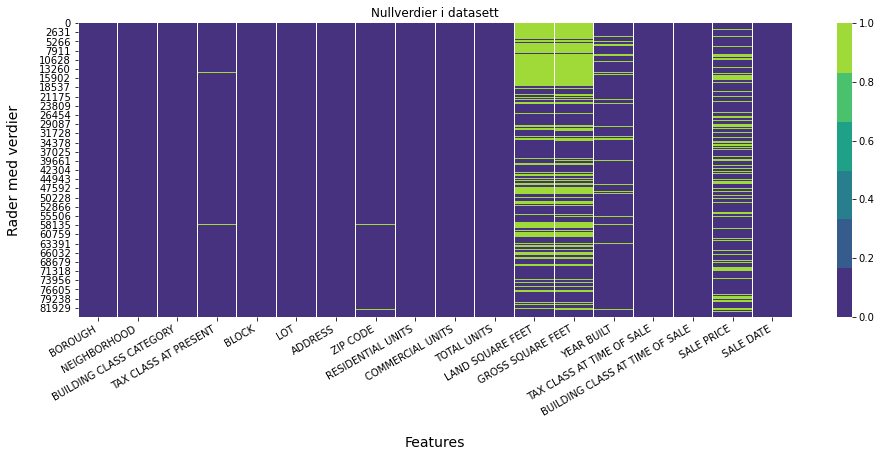

In [11]:
cmap = sns.color_palette("viridis")
fig, ax = plt.subplots(figsize=(16,6)) 

sns.heatmap(df.isna(), cmap=cmap, ax=ax)
plt.title("Nullverdier i datasett")

plt.xlabel('Features', fontsize=14, labelpad=18)
plt.ylabel('Rader med verdier', fontsize=14, labelpad=18)

fig.autofmt_xdate()
plt.show()

> Visualisering av nullverdier i datasett

In [12]:
# Ny sjekk.
print("Prosentandel null eller na for features:")

null_features = df.isna().sum()  # Velger bare features med NaN-verdier
((null_features[null_features > 0] * 100 / df.index.size).round(2).sort_values(ascending = False))

Prosentandel null eller na for features:


GROSS SQUARE FEET       46.24
LAND SQUARE FEET        43.39
SALE PRICE              28.87
YEAR BUILT               8.22
ZIP CODE                 1.16
TAX CLASS AT PRESENT     0.88
dtype: float64

In [13]:
# Sletter rader med nullverdi.
df = df.dropna()

print("Etter nullverdier er fjernet: \n" )

print("Antall kolonner:", df.shape[0])
print("Antall rader:", df.shape[1])

Etter nullverdier er fjernet: 

Antall kolonner: 29189
Antall rader: 18


---
### Endring av datatyper
Nå inneholder alle features gyldige verdier. Men som vi nevnte etter ProfileReport er enkelte av **datatypene** (Dtype) for features ikke passende etter vår mening. Illustrert under:

In [14]:
df.info(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29189 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         29189 non-null  int64  
 1   NEIGHBORHOOD                    29189 non-null  object 
 2   BUILDING CLASS CATEGORY         29189 non-null  object 
 3   TAX CLASS AT PRESENT            29189 non-null  object 
 4   BLOCK                           29189 non-null  int64  
 5   LOT                             29189 non-null  int64  
 6   ADDRESS                         29189 non-null  object 
 7   ZIP CODE                        29189 non-null  float64
 8   RESIDENTIAL UNITS               29189 non-null  int64  
 9   COMMERCIAL UNITS                29189 non-null  int64  
 10  TOTAL UNITS                     29189 non-null  int64  
 11  LAND SQUARE FEET                29189 non-null  object 
 12  GROSS SQUARE FEET               

Over ser vi at DataFrame består av Dtype object, int64 og float64.
Vi tenker å endre alle disse til 2 spesifikke datatyper:

- **Kategorisk**: For features med tekstverdier (Neighborhood, Building Class o.l.)


- **Numerisk**: For features med numeriske verdier. (Sale Price, Square Feet o.l.)

---

Før vi starter endringen av datatypene er det en feature vi vi endre litt på først:

- Sale Date:
    - Vi ønsker bare å bare beholde årstall her.
    - Vi mener dette blir en mer generell feature enn hvis vi skal ta med utallige kombinasjoner av dato og måneder.
 
---

In [15]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE']) # Endrer fra 'object' til 'datetime'

df['SALE DATE'] = df['SALE DATE'].dt.year  # Beholder kun årstall

In [16]:
# Caster utvalgte features til numerisk datatype

numeric_col = ["ZIP CODE", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "SALE PRICE", "SALE DATE"]

for col in numeric_col:
    if df[col].dtypes == np.float64: # Hvis float
        df[col] = df[col].astype(np.int64)
    else: 
        df[col] = df[col].astype(str).astype(np.int64) # For object må vi caste til string først 
        

In [17]:
# Caster object-datatype til kategoriske features

for col in df.select_dtypes(include='object'): # Velger bare dtype 'object'
    df[col] = df[col].astype('category')
    
    
print("Oppdaterte datatyper:")
df.dtypes

Oppdaterte datatyper:


BOROUGH                              int64
NEIGHBORHOOD                      category
BUILDING CLASS CATEGORY           category
TAX CLASS AT PRESENT              category
BLOCK                                int64
LOT                                  int64
ADDRESS                           category
ZIP CODE                             int64
RESIDENTIAL UNITS                    int64
COMMERCIAL UNITS                     int64
TOTAL UNITS                          int64
LAND SQUARE FEET                     int64
GROSS SQUARE FEET                    int64
YEAR BUILT                           int64
TAX CLASS AT TIME OF SALE            int64
BUILDING CLASS AT TIME OF SALE    category
SALE PRICE                           int64
SALE DATE                            int64
dtype: object

--- 
### Valg av features

---
#### Numeriske features

Vi kan bruke **Correlation Matrix** for å se hvilke numeriske features som har størst korrelasjon med hverandre.

Dette hjelper oss i å velge hvilke features som skal brukes som input i predikasjonen. 

Jo større positiv og negativ korrelasjon, desto større sammenheng har features med hverandre.

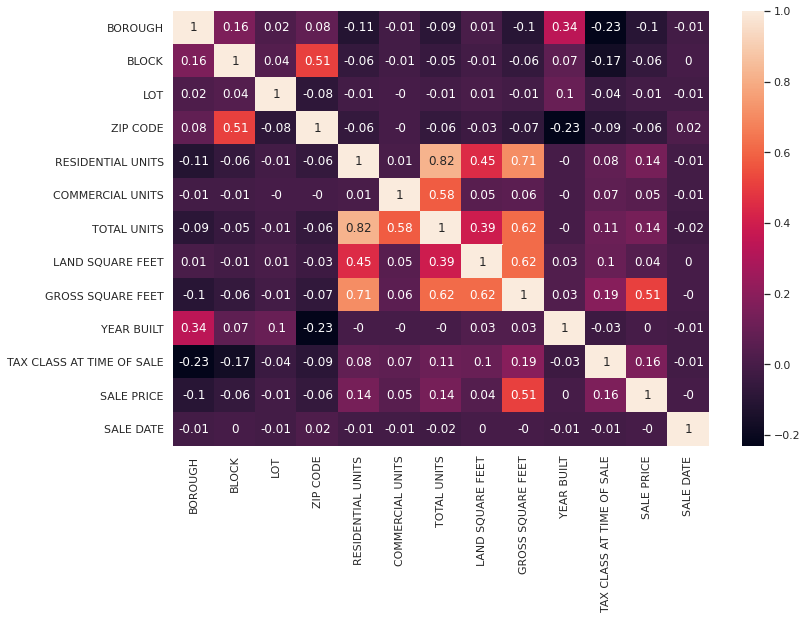

In [18]:
# Viser korrelasjon for dataframe.
correlation_matrix = df.corr().round(2) # Runder av til 2 desimaler. 

sns.set(rc={'figure.figsize':(12, 8)}) 

sns.heatmap(data=correlation_matrix, annot=True) # Viser korrelasjonverdi for hver feature
plt.show()

Observasjoner:

Vår target feature, Sale Price, har:

- Størst positiv korrelasjon med: 
    - Gross Square Feet (0.51)
    - Tax Class At Time of Sale (0.16)
    - Residential/Total Units (0.14)
    
    
- Størst negativ korrelasjon med:
    - Borough (-0.10)
    - Zip Code (-0.06)
    - Block (-0.06)
  
Her vil vi droppe de som har 0 eller ligger veldig nært 0, ettersom de ikke har mye å si for vår target feature, Sale Price.
Dvs.: 
- Year Built

- Sale Date

- Lot

- Land Square Feet  (Har i tillegg høy korrelasjon med Gross Square Feet, som også er et argument for å droppe den som input)



In [19]:
# Dropper features med svak korrelasjon (+- 0)

del df['YEAR BUILT']
del df['SALE DATE']
del df['LOT']
del df['LAND SQUARE FEET']

Vi kan plotte grafer av features med størst positiv og negativ korrelasjon for å visualisere sammenhengene.

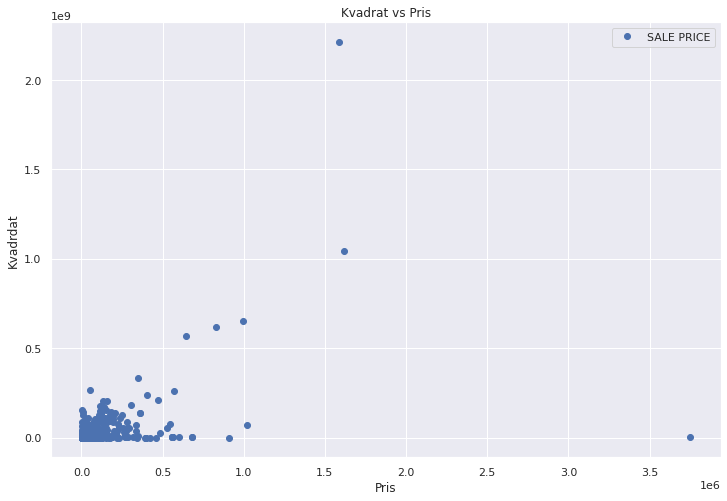

In [20]:
df.plot(x='GROSS SQUARE FEET', y='SALE PRICE', style='o')
plt.title('Kvadrat vs Pris')
plt.xlabel('Pris')
plt.ylabel('Kvadrdat')
plt.show()

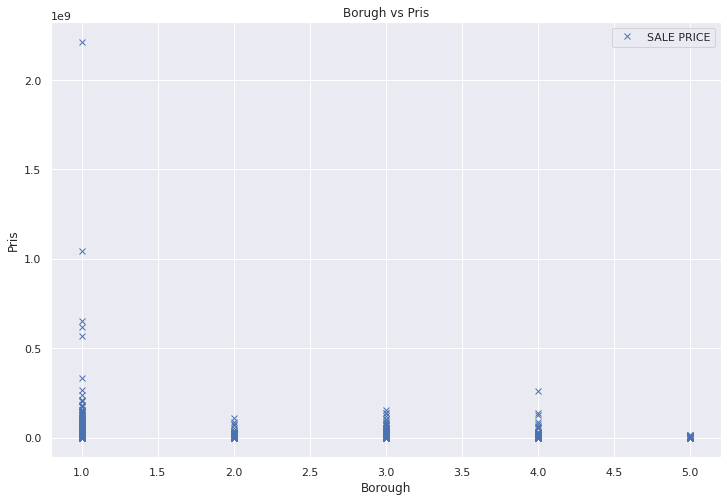

In [21]:
df.plot(x='BOROUGH', y='SALE PRICE', style='x')
plt.title('Borugh vs Pris')
plt.xlabel('Borough')
plt.ylabel('Pris')
plt.show()

> Ikke så tydelig, men vi ser de dyreste eiendommene tilhører Borough 1. Billigste Borough 5. 

--- 
#### Kategoriske features 

Her vil vi velge hvilke kategoriske features vi vil bruke som input

---
Men først vil vi gjøre Borough kategorisk. Det er deskriptivt å ha selve navnet på strøket sammenlignet med et tall.

In [22]:
# Endrer tall til navn på strøk

df["BOROUGH"] = df["BOROUGH"].map({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens',5:'Staten Island'}).astype('category')

In [23]:
categoric = df.select_dtypes(include='category') # Velger kun kategoriske features
categoric.describe().transpose()

,count,unique,top,freq
BOROUGH,29189,5,Queens,11043
NEIGHBORHOOD,29189,249,FLUSHING-NORTH,795
BUILDING CLASS CATEGORY,29189,30,01 ONE FAMILY DWELLINGS,12895
TAX CLASS AT PRESENT,29189,6,1,25389
ADDRESS,29189,28382,102 WEST 57TH STREET,22
BUILDING CLASS AT TIME OF SALE,29189,128,A1,4820


Observasjon: 

- **Borough, Tax Class og Building Class, Building Class At Time Of Sale:**

  - De to førstnevnte har en akseptabel mengde unike verdier som kan gjøres om til input features for Sale Price
  - Sistnevnte kan muligens reduseres noe
  
- **Neighborhood og Address:**
    - Som nevnt etter ProfileReport har disse veldig høy kardinalitet, altså mange unike verdier. 
    - På bakgrunn av det velger vi å droppe disse fra dataframe ettersom de vil skape flere tusen nye kategoriske features.


In [24]:
#Dropper features med høy kardinalitet 

del df["ADDRESS"]
del df["NEIGHBORHOOD"]

# Dropper også fra categoric for plotting
del categoric["ADDRESS"]
del categoric["NEIGHBORHOOD"]


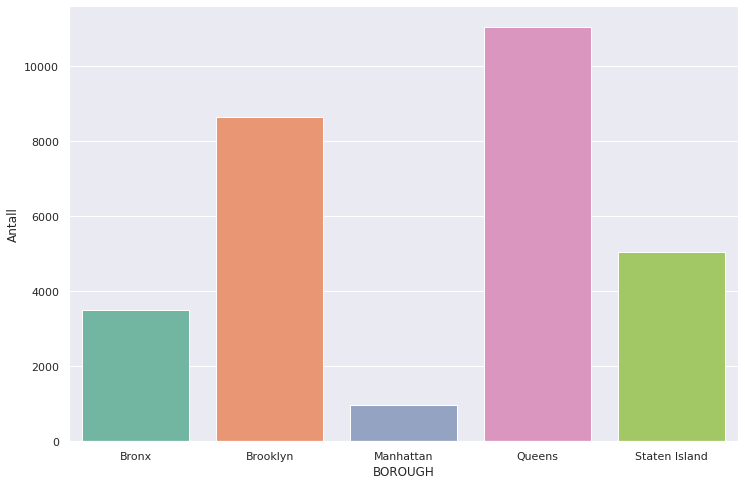

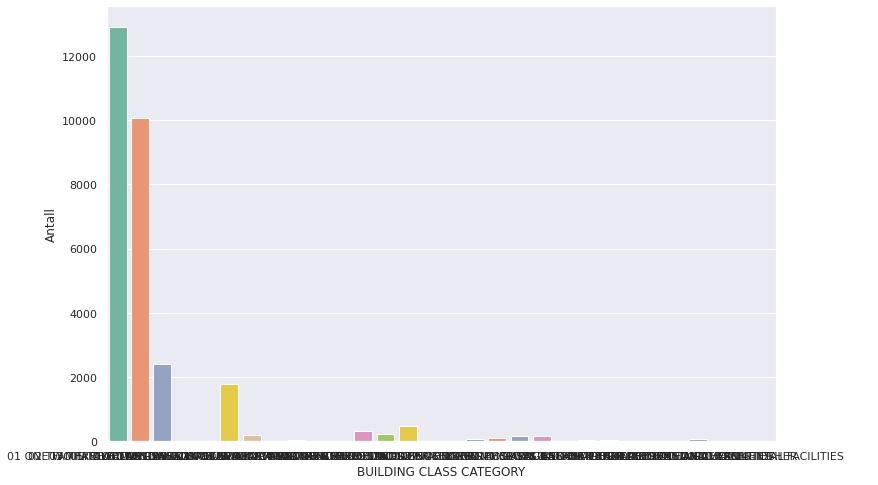

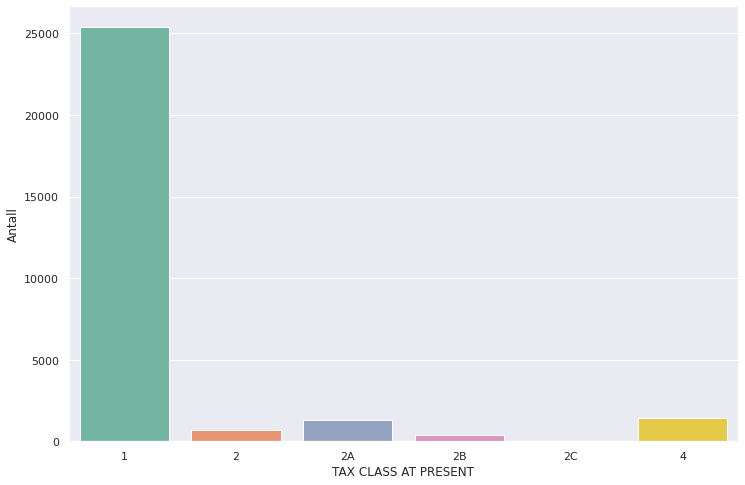

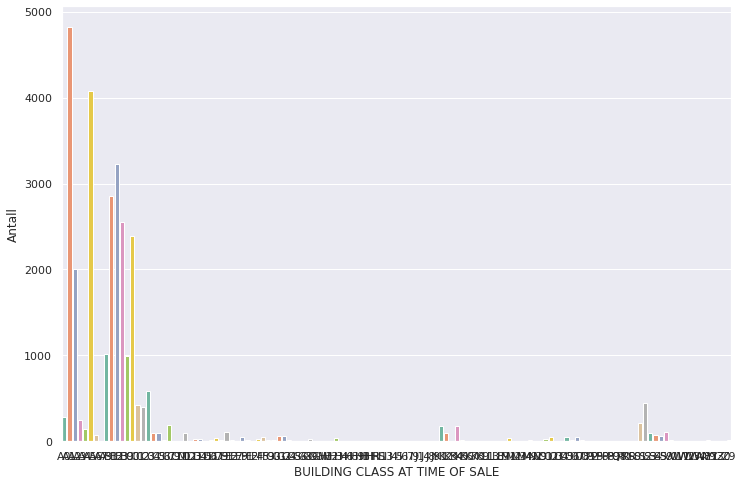

In [25]:
# Countplot gir oversikt over fordeling av verdier i hver kategori. 

for col in categoric.columns:
    sns.countplot(x=categoric[col], data=categoric,palette='Set2')
    plt.ylabel("Antall")
    plt.show()

**Observasjoner**:

- **Tax Class At Present**:
    - Kan fjerne klasse 2C da få/ingen eiendommer har denne klassen
    

- **Building Class Category og Building Class At Time Of Sale**:
     - En relativ stor mengde klasser ser ut til mangle eiendommer


Vi ser vi kan fjerne eller endre en del klasser fra kategoriene. 

--- 

**Tax Class At Present**

In [26]:
df.loc[df['TAX CLASS AT PRESENT']=='2C']

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
17919,Manhattan,09 COOPS - WALKUP APARTMENTS,2C,2114,10032,10,0,10,9355,2,C6,90000


In [27]:
# Bare én eiendom med Class 2C. Kan droppes.

df.drop(df.loc[df['TAX CLASS AT PRESENT']=='2C'].index, inplace=True)

**Building Class Category**

In [28]:
print("Prosentandel for hver Building Class:")
(df['BUILDING CLASS CATEGORY'].value_counts() * 100 / df.index.size).round(2)

Prosentandel for hver Building Class:


01 ONE FAMILY DWELLINGS                         44.18
02 TWO FAMILY DWELLINGS                         34.51
03 THREE FAMILY DWELLINGS                        8.21
07 RENTALS - WALKUP APARTMENTS                   6.14
22 STORE BUILDINGS                               1.67
14 RENTALS - 4-10 UNIT                           1.14
21 OFFICE BUILDINGS                              0.77
08 RENTALS - ELEVATOR APARTMENTS                 0.71
29 COMMERCIAL GARAGES                            0.58
30 WAREHOUSES                                    0.58
27 FACTORIES                                     0.37
37 RELIGIOUS FACILITIES                          0.22
26 OTHER HOTELS                                  0.21
10 COOPS - ELEVATOR APARTMENTS                   0.11
32 HOSPITAL AND HEALTH FACILITIES                0.10
33 EDUCATIONAL FACILITIES                        0.10
23 LOFT BUILDINGS                                0.08
35 INDOOR PUBLIC AND CULTURAL FACILITIES         0.05
38 ASYLUMS AND HOMES        

> Her kan vi droppe alle klasser som står for *under* 1% av totalen, uten at det gir store konsekvenser for predikasjon.


In [29]:
# 6 mest vanlige building classes og antallet på hver.

df['BUILDING CLASS CATEGORY'].value_counts()[:6].sort_values(ascending=False)

01 ONE FAMILY DWELLINGS                        12895
02 TWO FAMILY DWELLINGS                        10072
03 THREE FAMILY DWELLINGS                       2395
07 RENTALS - WALKUP APARTMENTS                  1793
22 STORE BUILDINGS                               486
14 RENTALS - 4-10 UNIT                           334
Name: BUILDING CLASS CATEGORY, dtype: int64

In [30]:
# Filtrerer vekk rader basert på info fra count_values() 

df = df.groupby('BUILDING CLASS CATEGORY').filter(lambda x : len(x)>333)  

# Fjerner kategorier for plotting
    
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].cat.remove_unused_categories()

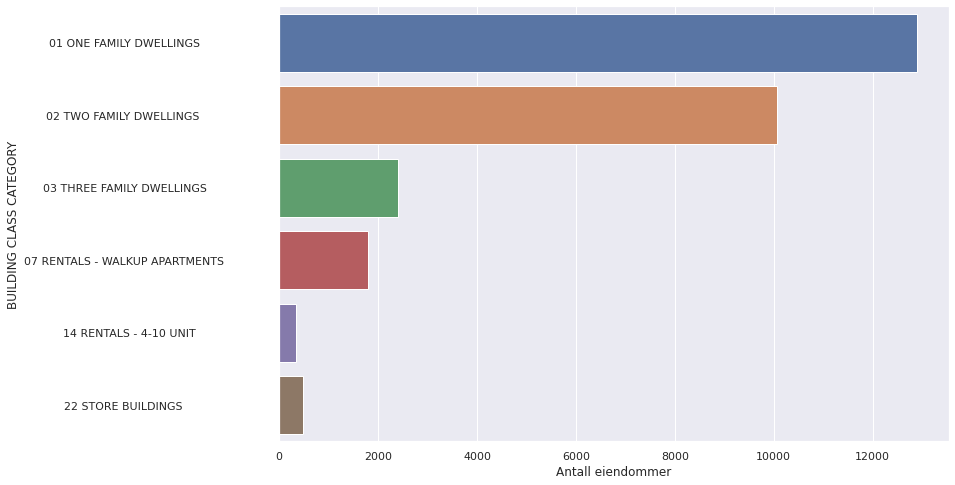

In [31]:
# Oppdatert plot for Building Class

sns.countplot(y="BUILDING CLASS CATEGORY", data=df)
plt.xlabel("Antall eiendommer")
plt.show()

**Building Class At Time of Sale**:

In [32]:
# Antall ganger verdier er brukt

print("Antall forekomster av hver klasse:")
df['BUILDING CLASS AT TIME OF SALE'].value_counts()

Antall forekomster av hver klasse:


A1    4820
A5    4079
B2    3229
B1    2852
B3    2557
      ... 
M3       0
M4       0
M9       0
N2       0
I4       0
Name: BUILDING CLASS AT TIME OF SALE, Length: 128, dtype: int64

> En del som har 0. Vi kan fjerne disse klassene fra datasettet.

In [33]:
# Fjerner klasser med 0 forekomster i datasett

df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].cat.remove_unused_categories()

# Etter ubrukte klasser droppes
(df['BUILDING CLASS AT TIME OF SALE'].value_counts() * 100 / df.index.size).round(2)

A1    17.23
A5    14.58
B2    11.54
B1    10.19
B3     9.14
C0     8.56
A2     7.15
A9     3.63
B9     3.53
C3     2.10
S2     1.60
C1     1.50
C2     1.41
A0     1.02
A3     0.87
S1     0.78
C7     0.70
K1     0.65
K4     0.63
A4     0.51
S9     0.41
C4     0.34
S3     0.34
C5     0.33
K2     0.33
A6     0.28
S4     0.25
S5     0.20
K5     0.04
K9     0.03
C9     0.03
A7     0.03
K7     0.03
K6     0.02
S0     0.02
K3     0.01
CM     0.00
K8     0.00
Name: BUILDING CLASS AT TIME OF SALE, dtype: float64

> Fortsatt noen klasser som har 0 forekomster, men som med *Building Class Category* vil vi kun beholde klasser som utgjør mer enn 1% av totalen

In [34]:
# Filtrerer vekk alle klasser som har mindre enn 285 forekomster (klasse A0)

df = df.groupby('BUILDING CLASS AT TIME OF SALE').filter(lambda x : len(x)>284)  

df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].cat.remove_unused_categories()

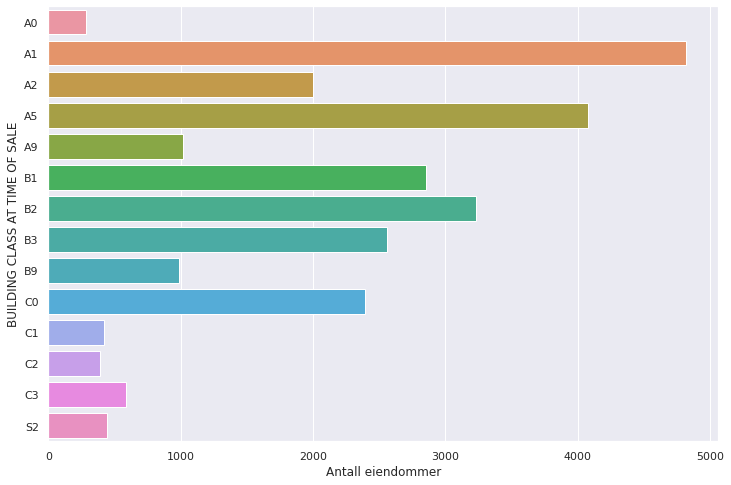

In [35]:
# Oppdatert plot for Building Class At Time Of Sale

sns.countplot(y="BUILDING CLASS AT TIME OF SALE", data=df)
plt.xlabel("Antall eiendommer")
plt.show()

In [36]:
df.select_dtypes(include='category').describe().transpose()

,count,unique,top,freq
BOROUGH,26068,5,Queens,10334
BUILDING CLASS CATEGORY,26068,4,01 ONE FAMILY DWELLINGS,12200
TAX CLASS AT PRESENT,26068,4,1,24668
BUILDING CLASS AT TIME OF SALE,26068,14,A1,4820


--- 
Da sitter vi igjen med 4 kategoriske features som vi kan bruke som input for predikasjon av Sale Price. 
- Borough
- Building Class Category
- Tax Class At Present 
- Building Class at Time Of Sale
---

###  Fjerning av ekstremverdier (outliers)

Selv om alle features har gyldige verdier, så kan enkelte numeriske verdier være ekstremt *høye* eller *lave* sammenlignet med majoriteten.
Disse kan trekke snittet for values høyt opp eller ned, og ha en negativ effekt på en god predikasjon.

Vi mener det er viktig å oppdage disse ekstremverdiene før scaling og testing på datasettet gjennomføres.

Koden for denne delen av preprocessing er inspirert fra: https://www.kaggle.com/pedramj/nyc-property-sales-data-cleaning-eda [1]

In [37]:
# Variabel for numeriske features

numeric = df.select_dtypes(include=np.number)

numeric.describe().transpose() # Statistikk for verdier i features

,count,mean,std,min,25%,50%,75%,max
BLOCK,26068.0,5782.556583,3.778892e+03,8.0,2984.00,5126.0,8041.25,16319.0
ZIP CODE,26068.0,11021.694952,4.602384e+02,10002.0,10465.00,11223.0,11377.00,11694.0
RESIDENTIAL UNITS,26068.0,2.002992,3.221826e+00,1.0,1.00,2.0,2.00,181.0
COMMERCIAL UNITS,26068.0,0.017723,1.322353e-01,0.0,0.00,0.0,0.00,2.0
TOTAL UNITS,26068.0,2.020255,3.224525e+00,1.0,1.00,2.0,2.00,181.0
GROSS SQUARE FEET,26068.0,2180.810189,2.720709e+03,240.0,1330.75,1778.0,2400.00,196200.0
TAX CLASS AT TIME OF SALE,26068.0,1.053744,2.255163e-01,1.0,1.00,1.0,1.00,2.0
SALE PRICE,26068.0,797587.873907,1.225221e+06,1.0,411375.00,590000.0,865000.00,63600000.0


Ovenfor ser vi f.eks. at laveste Sale Price er på 1 dollar mens høyeste er på 63 millioner dollar. <br> 

Alle kvartiler er under 1 million dollar, hvilket indikerer at de oppgitte min- og max-verdiene et godt stykke unna majoriteten.

---

Med boxplot kan vi visualisere distribisjonen av Sale Price

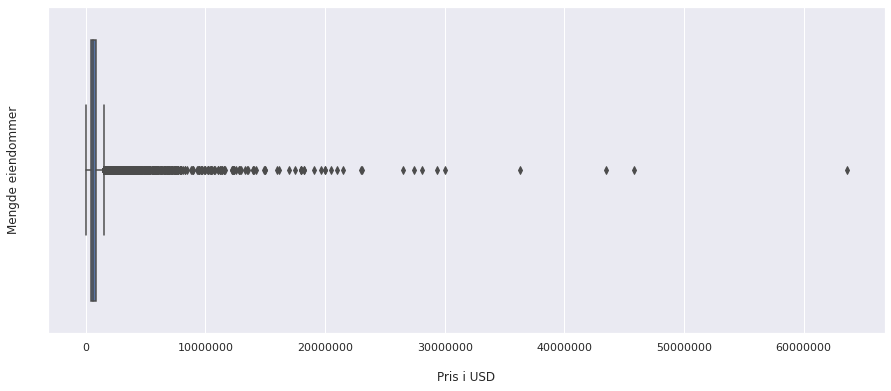

In [38]:
#Boxplot for Sale Price

plt.figure(figsize=(15,6))
sns.boxplot(x='SALE PRICE', data=numeric)

plt.xlabel('Pris i USD', fontsize=12, labelpad=18)
plt.ylabel('Mengde eiendommer', fontsize=12, labelpad=18)
plt.ticklabel_format(style='plain', axis='x')

plt.show()

> Som forventet er majoriteten av Sale Prices relativt lav (markert i den vertikale linjen), mens vi har små samlinger av mengder med priser går ut til over 60 millioner

---
Vi ønsker å lage et nytt spekter, eller range, for Sale Price i dataframe. 
Vi kan plotte et nytt boxplot, denne gangen *uten* outliers

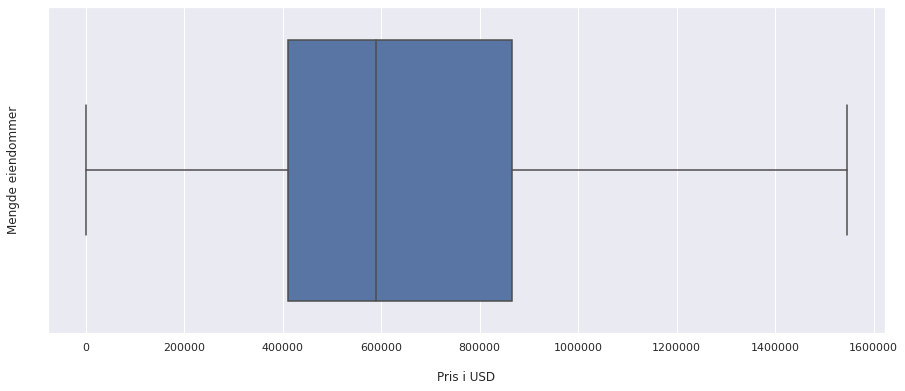

In [39]:
#Boxplot for Sale Price uten outliers
plt.figure(figsize=(15,6))
sns.boxplot(x='SALE PRICE', data=numeric, showfliers=False)  # Viser ikke outliers 

plt.xlabel('Pris i USD', fontsize=12, labelpad=18)
plt.ylabel('Mengde eiendommer', fontsize=12, labelpad=18)
plt.ticklabel_format(style='plain', axis='x')

plt.show()

Her får vi en bedre oversikt over Sale Price-distribusjonen.

- Den blå figuren er kjent som IQR, eller **interkvartilavstanden**. <br> Alle verdier inni figuren illustrerer kvantilene av verdiene (25-75%).


- Den svarte linjen i midten av figuren er median


- Alt i mellom de vertikale linjene er 1,5 ganger mindre/større enn verdien inni den blå figuren.


- Alle points utenfor disse linjene er outliers, som vi ønsker å fjerne.

---

In [40]:
print("Antall eiendommer under 10,000 dollar:  ", len(df[df["SALE PRICE"] < 10000]))

print("Antall eiendommer over 10,000,000 dollar: ",len(df[df["SALE PRICE"] > 10000000]))

Antall eiendommer under 10,000 dollar:   770
Antall eiendommer over 10,000,000 dollar:  73


Her kunne vi valgt å sette ny range fra 1 dollar og oppover til 1.6 millioner dollar, men hvis vi skal tenke realistisk, så mener vi det er *svært usannsynlig* at en eiendom blir *solgt* for en såpass lav pris.


Vi velger derfor å sette ny range fra **10,000** til **1,600,000 dollar**

In [41]:
# Fjerner rader hvor Sale Price er under og over gitt verdi

df = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 1600000)] 

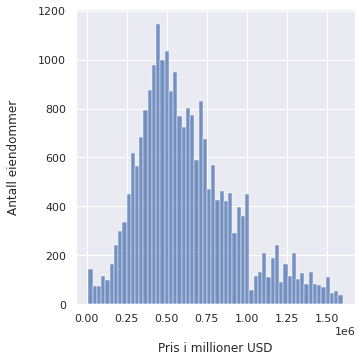

In [42]:
# Plotter fordeling av priser 
sns.displot(df['SALE PRICE'])
plt.xlabel('Pris i millioner USD', fontsize=12, labelpad=18)
plt.ylabel('Antall eiendommer', fontsize=12, labelpad=18)
plt.show()

---
Vi gjør det samme for andre features etter behov

In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BLOCK,23568.0,6000.292261,3769.179946,15.0,3279.00,5331.0,8313.25,16317.0
ZIP CODE,23568.0,11021.499321,462.274158,10014.0,10465.00,11228.0,11379.00,11694.0
RESIDENTIAL UNITS,23568.0,1.698277,1.105260,1.0,1.00,2.0,2.00,72.0
COMMERCIAL UNITS,23568.0,0.014978,0.121816,0.0,0.00,0.0,0.00,2.0
TOTAL UNITS,23568.0,1.712746,1.115575,1.0,1.00,2.0,2.00,72.0
GROSS SQUARE FEET,23568.0,1912.279319,1022.496119,240.0,1305.75,1710.0,2280.00,72000.0
TAX CLASS AT TIME OF SALE,23568.0,1.032374,0.176996,1.0,1.00,1.0,1.00,2.0
SALE PRICE,23568.0,633128.258232,308385.784958,10001.0,419666.00,575000.0,800000.00,1599000.0


> Gross Square Feet, Total Units og Residential Units ser ut til å ha outliers basert på statistikken over. <br>
> De andre ser ut til å ha akseptabel min- og max-verdier, så vi lar de være.

---
Fjerner outliers fra Gross og Land Square Feet

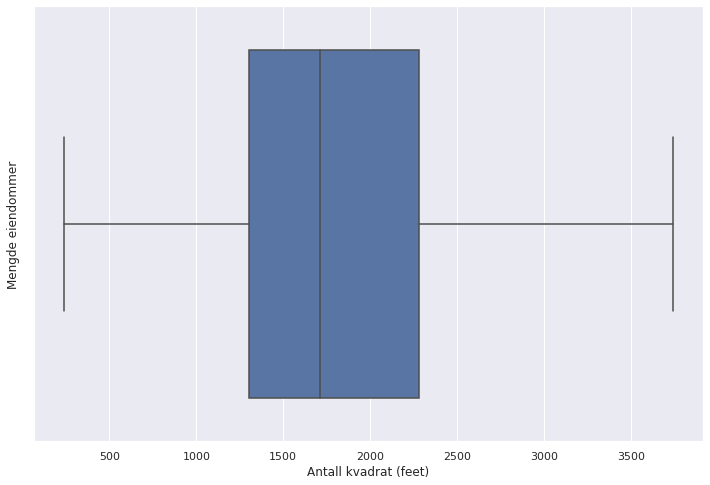

In [44]:
sns.boxplot(x='GROSS SQUARE FEET', data=df, showfliers=False)
plt.ylabel("Mengde eiendommer", fontsize=12)
plt.xlabel("Antall kvadrat (feet)", fontsize=12)
plt.show()

In [45]:
df = df[(df['GROSS SQUARE FEET'] < 3800)]  # Endrer kun max-verdi 

Fjerner outliers fra Total Units og Residential Units

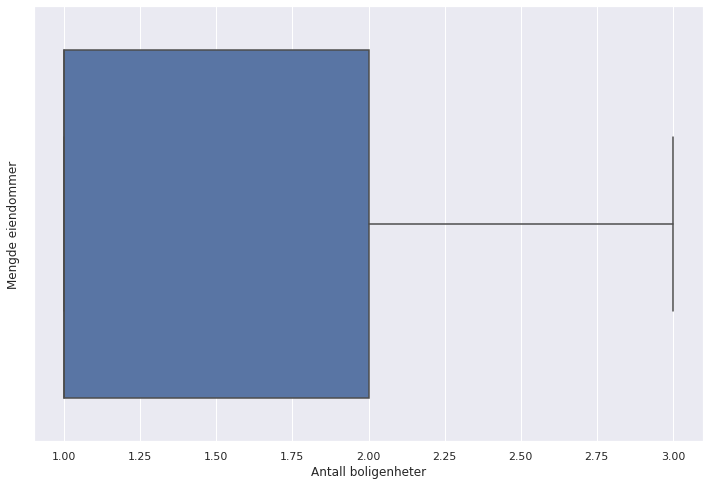

In [46]:
sns.boxplot(x='TOTAL UNITS', data=df, showfliers=False)
plt.ylabel("Mengde eiendommer", fontsize=12)
plt.xlabel("Antall boligenheter", fontsize=12)
plt.show()

In [47]:
df = df[(df['TOTAL UNITS'] <= 3)]  # Endrer kun max-verdi 

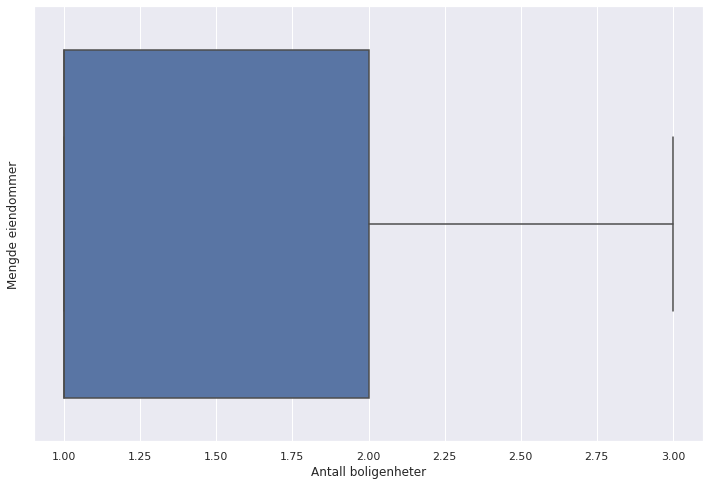

In [48]:
sns.boxplot(x='RESIDENTIAL UNITS', data=df, showfliers=True)
plt.ylabel("Mengde eiendommer", fontsize=12)
plt.xlabel("Antall boligenheter", fontsize=12)
plt.show()

> Residential Units har ingen outliers etter endringer i andre features

In [49]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BLOCK,22477.0,6090.996174,3788.529297,15.0,3331.0,5415.0,8502.0,16317.0
ZIP CODE,22477.0,11022.050852,464.381427,10014.0,10465.0,11229.0,11385.0,11694.0
RESIDENTIAL UNITS,22477.0,1.568092,0.642805,1.0,1.0,1.0,2.0,3.0
COMMERCIAL UNITS,22477.0,0.013302,0.114957,0.0,0.0,0.0,0.0,2.0
TOTAL UNITS,22477.0,1.580994,0.661053,1.0,1.0,1.0,2.0,3.0
GROSS SQUARE FEET,22477.0,1797.895182,653.621900,240.0,1294.0,1664.0,2196.0,3795.0
TAX CLASS AT TIME OF SALE,22477.0,1.000089,0.009433,1.0,1.0,1.0,1.0,2.0
SALE PRICE,22477.0,621021.629088,298431.358735,10001.0,415000.0,565000.0,789000.0,1595790.0


> Slik ser de nye numeriske verdiene ut etter fjerning av outliers. 

### Scaling og One-Hot-Encoding
--- 

**Scaling**

Her vil vi skalere alle verdier i datasettet slik at det blir tilpasset test- og treningsett. 

Vi velger å bruke **MinMaxScaler** siden den vil sette alle verdier fra 0 og 1 uten å manipulerere max-og min-verdiene i særlig grad.

Vi kunne f.eks. ha brukt RobustScaler, men den vil i noe grad ignorere outliers og manipulere verdier.
Siden vi har gjort det i preprocessing, mener vi MinMaxScaler passer best. 

Koden for denne delen av preprocessing er inspirert fra https://www.kaggle.com/sahilrider/learn-regression-nyc   [2]

In [50]:
# Import 
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 

num_features = df.select_dtypes(include=np.int64) # Velger kun numeriske features

scaler.fit(df[num_features.columns]) 
scaled = scaler.transform(df[num_features.columns]) 

for i, col in enumerate(num_features.columns): # Skalerer hver kolonne 
       df[col] = scaled[:,i]

        
# Numeriske verdier er forandret fra floating points mellom 0 og 1         
df.sample(1)

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
72703,Queens,02 TWO FAMILY DWELLINGS,1,0.732978,0.845833,0.5,0.0,0.5,0.362869,0.0,B3,0.238303


---
**One-Hot-Enconding**

For å gjøre kategoriske verdier numeriske bruker vi pandas *get_dummies( )*. 
Funksjonen gjør om selve verdiene til egne kolonner i dataframe. <br> 
Disse kolonnene får så tilskrevet binære verdier (0 og 1) basert på om hver enkelt rad i dataframe tilhører den kategorien eller ikke. 

Illustrert her:


Fra: 

| Tax Class | Sale Price |
|:---|:-------|
| 2A | 500000 | 
| 2B | 760000 | 

 <br>
 
 Til:


| Tax Class_2A | Tax Class_2B | Sale Price |
|:-------------|:-----------|:-----------|
| 1 | 0 | 500000 |
| 0 | 1 | 760000 | 




In [51]:
# Velger kategoriske features som skal gjøres om til binære verdier.

dummies = pd.Categorical(df.select_dtypes(include='category')) # Velger kategoriske features

encoded_features = pd.get_dummies(df[dummies]) 

In [52]:
# Lager ny dataframe med dummies

final_df = df.drop(dummies,axis=1)  # Endrer plassering av features med one-hot-encoding 
final_df = pd.concat([final_df, encoded_features] ,axis=1)  

final_df.sample(3)

,BLOCK,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,SALE PRICE,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_4,BUILDING CLASS AT TIME OF SALE_A0,BUILDING CLASS AT TIME OF SALE_A1,BUILDING CLASS AT TIME OF SALE_A2,BUILDING CLASS AT TIME OF SALE_A5,BUILDING CLASS AT TIME OF SALE_A9,BUILDING CLASS AT TIME OF SALE_B1,BUILDING CLASS AT TIME OF SALE_B2,BUILDING CLASS AT TIME OF SALE_B3,BUILDING CLASS AT TIME OF SALE_B9,BUILDING CLASS AT TIME OF SALE_C0,BUILDING CLASS AT TIME OF SALE_C1,BUILDING CLASS AT TIME OF SALE_C2,BUILDING CLASS AT TIME OF SALE_C3,BUILDING CLASS AT TIME OF SALE_S2
42227,0.464360,0.711905,0.0,0.0,0.0,0.519831,0.0,0.851311,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
24457,0.306036,0.269048,0.0,0.0,0.0,0.288608,0.0,0.259176,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
72863,0.711630,0.836905,0.0,0.0,0.0,0.331364,0.0,0.312777,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Test og Trening 

In [53]:
# Importerer nødvendige pakker

from sklearn import metrics, tree
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [54]:
# Splitter opp i train- og testsett. 

X = final_df.drop('SALE PRICE', axis=1) # features  
y = final_df['SALE PRICE']  # target

X_train , X_test, y_train , y_test = train_test_split(X , y, test_size = 0.2, random_state=0) # 80/20-split på train og test

print(X_train.shape, y_test.shape) # Antall rader og kolonner på train og target

(17981, 38) (4496,)


---
# Modeller

### Presentasjon av modeller

Vi har valgt å bruke følgende modeller:
- Decision Tree
- Ridge
- Lasso
- Feedforward Neural Network 1
- Feedforward Neural Network 2

Med bakgrunn i at Decision Tree ikke tar i bruk regularisering ønsket vi å sammenligne resultatene fra denne opp mot resultatene fra modellene Ridge og Lasso som benytter seg av regularisering. 

Ved å bruke metodene Feedforward Nerual Network 1 og 2, ønsket vi å sammenligne resultatene av disse opp mot hverandre. 

--- 
Vi vil vurdere modellene basert på:

**Traning- og testscore**
- Hvor godt tilpasset datasettet er modellen

**R2 Score**:
- Hvor godt modellen klarer å predikere målt i prosent 

**Root Square Mean Error (RSME)**:
- Hvor langt unna predikerte verdier er fra faktiske verdier. I vårt tilfelle, avstanden ( *over* eller *under*) fra en en predikert salgspris til faktisk salgspris. 

---
## Modell 1 : Decision Tree Regressor

Om Decison Trees:

Decision tree innenfor maskinlæring er en prediktiv model som bryter ned et datasett inn i mindre delmengder som resulterer i valgnoder og bladnoder. Valgnoder er noder som igjen splitter seg i mindre delmengder, mens bladnoder er noder som har delt seg til maks utifra hvilke parametere du har satt, som f.eks max_depth. I Decision tree regresjon som vi bruker vil bladnoden være en numerisk verdi som representerer målet modellen har predikert.

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

DecisionTreeRegModel = DecisionTreeRegressor(criterion = 'mse', max_depth = 200, max_features = 'auto', min_samples_leaf = 0.0006)
DecisionTreeRegModel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=200, max_features='auto',
                      min_samples_leaf=0.0006)

---
DecisionTreeRegressor-parametere:

- **Min_samples_leaf limiterer**: Hvor mange samples minimum du må ha i en bladnode. En min_samples_leaf på 0.0006 gir minimum antall samples i en bladnode til 0.0006 ganger antall samples i dataframen.


- **Max_features**: Sier hvor mange features modellen skal bruke. Auto for max_features setter mengden features som brukes til mengden features i dataframen.


- **Max_depth**: Sier hvor dypt en går ned treet. En max_depth på 200 gjør at toppnoden ikke kan splittes mer enn 200 ganger.


- **Criterion**: Er funksjonen som måler kvaliteten på en split. MSE for Criterion betyr at funksjonen mean square error brukes til å måle kvaliteten på hver split.

---

In [56]:
dt_y_pred = DecisionTreeRegModel.predict(X_test)

DTResult = pd.DataFrame({'Actual': y_test, 'Predicted': dt_y_pred}) 
DTResult.sample(8)

,Actual,Predicted
82682,0.302057,0.311036
55885,0.387819,0.312373
40285,0.856355,0.528328
81605,0.213773,0.231648
83196,0.498174,0.358049
67220,0.371423,0.388736
19531,0.318453,0.257267
82235,0.088283,0.419113


In [69]:
r2score = DecisionTreeRegModel.score(X_test, y_test)

print("Root Mean Squared Error","%.5f" % np.sqrt(mean_squared_error(y_test,dt_y_pred))) 
print("R2 Score:","%.2f" % r2score) 

Root Mean Squared Error 0.13385
R2 Score: 0.48


---

## Modell 2: Ridge Regression


Ridge er en lineær modell for regresjon. Det finnes mange ulike lineære modeller og forskjellen mellom disse baserer seg både på hvordan parameterne w (koeffisient) og b (inptercep) læres av treningsdataene, men også hvordan det er mulig å kontrollere kompleksiteten i modellene.

I Ridge-modellen blir koeffisientene (w) valgt slik at de forutsier resultatene godt på treningsdataene, men også slik at de passer ytterligere begrensninger. Det er også ønskelig at størrelsen på alle koeffisientene (w) skal være så nær null som mulig. Dette betyr at hver funksjon skal ha minimal effekt på utfallet, men likevel skal den kunne forutsi resultatene godt. I Ridge brukes L2-regulering, som vil si at modellen prøver å estimere gjennomsnittet av dataene slik at man unngår overtilpasning (overfitting). [3]

---
Ridge har et parameter kalt alpha, som bestemmer hvor streng reguleringen skal være. 
Vi kan finne den optimale alpha-verdien ved å bruke *Ridge Cross-Validation* på features og target.

In [58]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV()
model_cv = ridge_cv.fit(X, y)
model_cv.alpha_

1.0

In [59]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0, max_iter=5000).fit(X_train, y_train)  # Modell med optimal alpha 

print("Training set score:  {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score:  {:.2f}".format(ridge.score(X_test,y_test)))
print("Antall features brukt {}".format(np.sum(ridge.coef_ != 0)))

Training set score:  0.34
Test set score:  0.35
Antall features brukt 28


In [60]:
# Predikerer X_test   
ridge_pred = ridge.predict(X_test)

# Resultater i egen df
ridge_result = pd.DataFrame({'Actual': y_test, 'Predicted': ridge_pred}) 
ridge_result.sample(8)

,Actual,Predicted
68645,0.322867,0.392286
52181,0.617988,0.243959
70431,0.384666,0.353053
72092,0.383405,0.314705
63539,0.734649,0.596742
82632,0.450879,0.422215
75483,0.545469,0.443524
19593,0.372054,0.336331


In [61]:
print("Root Mean Squared Error","%.5f" % np.sqrt(mean_squared_error(y_test,ridge_pred))) 
print("R2 Score:","%.2f" % r2_score(y_test, ridge_pred)) 

Root Mean Squared Error 0.14985
R2 Score: 0.35


> Ikke veldig høy testscore. R2 er lavere enn Decision Trees. 

---

## Modell 3: Lasso Regression

---
Et alternativ til Ridge for å regulere lineær regresjon er Lasso. Som med Ridge, begrenser også Lasso koeffisientene til å være nær null. Forskjellen er at Lasso bruker L1-regulering, dette vil si at noen koeffisienter nøyaktig er null som igjen betyr at enkelte funksjoner ignoreres av modellen. At noen koeffisienter nøyaktig er null, kan gjøre modellen lettere å tolke samtidig som det kan avsløre de viktigste funksjonene i modellen. [3]




Her kan vi også bruke Cross-Validation først for å finne optimal alpha.

In [62]:
from sklearn.linear_model import LassoCV

model_cv2 = LassoCV()
model_cv2.fit(X, y)
model_cv2.alpha_

0.000506554146274264

In [63]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.0005, max_iter=100000).fit(X_train, y_train) # Optimal alpha, prøver høyere max_iter enn Ridge

print("Traning set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Antall features brukt {}".format(np.sum(lasso.coef_ != 0)))

Traning set score: 0.33
Test set score: 0.34
Antall features brukt 11


In [64]:
# Predikerer X_test   

lasso_pred = lasso.predict(X_test)

In [65]:
# Resultater i egen df
lasso_result = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})
lasso_result.sample(8)

,Actual,Predicted
79666,0.121910,0.368941
78757,0.324759,0.311015
56963,0.602223,0.463965
76455,0.232691,0.243296
77800,0.230282,0.271049
42637,0.416196,0.342938
53077,0.059276,0.407952
28259,0.731496,0.504415


In [66]:
print("Root Mean Squared Error","%.5f" % np.sqrt(mean_squared_error(y_test,lasso_pred))) 
print("R2 Score:","%.2f" % r2_score(y_test, lasso_pred)) 

Root Mean Squared Error 0.15062
R2 Score: 0.34


> RSME og R2 marginalt dårligere sammelignet med Ridge. 

## Modell 4 : Feedforward Neural Network 1

In [67]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes = [350, 170, 90, 45, 10], activation = 'relu', alpha = 0.0001, max_iter=10000, solver = 'adam')
nn.fit(X_train, y_train)
print("Neural Network 1")
print("Training score:", nn.score(X_train, y_train))
print("Test score:", nn.score(X_test, y_test))

Neural Network 1
Training score: 0.49160308184318857
Test score: 0.47129638703025334


**Observasjoner:**

Det forekommer lav grad av overfitting (ca. 3%-5%) ved 'relu' som valgt aktiveringsfunksjon  og 'adam' som solver. 

Test-og-trenings- resultatene varierer mellom 40% og 50%, men generelt sett er avstanden mellom resultatene av prediksjon på treningsdatasett og prediksjon på testdatasett ganske liten. Det lille overiftting vi ser er nok på grunn av modellens kompleksitet, men siden økt kompleksitet gir merkbart høyere prediksjonsscore, er dette en "trade-off" som er verdt det. 

Lav grad av overfitting indikerer at modellen lærer genuine mønstre og trender som finnest i den generelle dataen, uten å tilpasse seg testsettet for mye. Alpha-verdien har vært viktig for modllens resultater - ved en alpha-verdi på 1, gjorde modellen det veldig dårlig, med opptil negative resultat. En forandring av alpha fra 1 til 0.1 gir et umiddelbart bedre prediksjonsresultat på flere titalls prosent. Derfra er gevinsten ved å minske alpha mindre, men likevel merkbar, frem til en verdi på 0.0001. Videre minsking av alpha har ikke lengre særlig virkning på scoren. Modellens prediction accuracy øker sakte sammen med økning av tallet på gjemte lag og antall noder i disse lagene, til et visst punkt - 


Ved over 5 lag der de siste lagene inneholder et veldig lavt antall noder, går modellens prediksjonsscore ned til minusverdier igjen. Dersom raten mellom lagstørrelsen blir 'skjev', går modellens prediction accuracy ned og den blir dessuten ustabil. Ved å øke modellens kompleksitet vha flere lag og flere noder i lagene, kreves det mer beregningskraft og går hastigheten ned, men  til gjengjeld får vi merkbart bedre prediction scores. 

Hastigheten er likevel optimal i forhold til dersom solver var lbfgs. 
Økning av max_iter utover 10,000 iterations øker beregningskraften som trengs ennå mer, uten at det forandrer modellens prediction scores i særlig grad. 

## Modell 5 : Feedforward Neural Network 2

In [68]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes = [3], activation = 'logistic', alpha = 0.00001, max_iter=6000, solver = 'lbfgs')
nn.fit(X_train, y_train)
print("Neural Network 2")
print("Training score:", nn.score(X_train, y_train))
print("Test score:", nn.score(X_test, y_test))

Neural Network 2
Training score: 0.33892592509963415
Test score: 0.34548933026702067


**Observasjoner**: 

Aktiveringsfunksjonen 'logistic' ser ut til å være en del raskere enn 'relu' som ble brukt i modell 4 men resultatene er gjennomgående mye lavere, og den takler ikke store mengder lag eller store mengder noder i det hele tatt. Den er meget ustabil og  svært utsatt for overfitting dersom der er mer enn et par gjemte lag med et lavt antall noder i. 

Ved å holde antall lag og antall noder i hvert lag nede, blir modellen mer stabil og prediction accuracy blir også bedre.Dette minimerer også hvor mye overfitting vi ser, ned til  ca. 2%. 

Videre er alpha-verdien svært viktig, også her. Dersom alpha = 1, ser vi for det meste negative prediction scores. 

Justering av alpha gav høyere verdier i scores, men ikke før en alpha-verdi på 0.001 ble denne verdien sterkt merkbar. En alpha-verdi på 0.001 forbedrer modellens stabilitet i prediction outcomes, i tillegg til å minimere overfitting, men modellen er likevel ustabil, selv med en alphaverdi på 0.00001, solver 'adam' og iteration number 10,000. 

En lavere max_iter - verdi gjør at modellen kjører raskere, men det gjør ikke noe for å forbedre stabilitet eller resultat. Modellen svinger fortsatt mellom 31-34% og 08-14%. 

Ved å bruke solver 'lbfgs' i stedet for 'adam' fikser stabilitets-problemet - modellens prediction score er nå stabil på rundt 31% - 35% -uten plutselige hopp ned i ett-siffrede scorer- med få lag og max_iter size på 5000. 

En Max_Iter size på mellom 3000 og 7000 ser ut til å gi optimale resultater - høyere og lavere verdier enn dette gir dårligere prediction score. Ved å øke antall layers og noder får vi negative verdier i prediction score. Ved å beholde et lavt antall gjemte  lag og så øke antall noder i de gjemte lagene, blir modellen drastisk tregere, og accuracy blir dårligere i tillegg. 

Denne modellen trenger ikke mange noder eller lag for å kjøre sin beste prediction - faktisk er den på sitt beste med bare ett gjemt lag med et lavt antall noder. Modellen gjør det best med et lavt antall lag, et lavt antall noder i laget, max_iter verdier på 3000-6000, og alpha på 0.00001. 

Her ser vi prediction scores på opptil ca 40%. Andre justeringer av parameterene gir prediction score på rundt 30%, eller ustabilitet ned til ettsiffrede tall, eller negative verdier. 

# Konklusjon

Gjennom denne oppgaven har vi lært hvordan vi håndterer data gjennom analyse og preprocessing av datasettet og hvordan det påvirker utfallet til modellene. Vi har også lært noe om hvordan maskinlærings modellene brukes på datasett og hvordan deres parametere påvirker prediksjonen over datasett og de forskjellige målingene som RSME eller R2 score. 

Decision Trees kommer best av de 3 lineære regresjonsmodellene med best R2 og RSME.

Ridge bruker flere features enn Lasso, men får marginalt bedre R2- og RSME-score.

---

- **Fyll inn konklusjon om Neural Networks** : 

---

Vår konklusjon er da at styrken på reguleringen ikke har veldig mye å si for vårt prosesserte datasett. 

Grunnen til de relativ lave scorene kan være underfitting. 
Kanskje vi kunne droppet mindre features, eller droppet færre verdier. 
I stedet for å droppe nullverdier fra settet kunne vi muligens bruk pandas *mean( )*, som fyller nullverdier med gjennomsnittstallet for kolonnen de tilhører, slik at vi oppnår flere data points. 

En annen faktor er muligens slettingen av enkelte outliers og begrensing av klasser i kategoriske features. 

Men, som vi observerte fra korrelasjonsmatrisen hadde Sale Price i gjennomsnitt ganske svak korrelasjon de fleste andre features. Gross Square Feet var unntaket, hvor den nådde 0.51. Vi tenker at dette datasettet ikke er helt optimalisert for prediksjon av Sale Price ved bruk av våre modeller, grunnet den lave korrelasjonen.



---
Kilder:

[1] https://www.kaggle.com/pedramj/nyc-property-sales-data-cleaning-eda

[2] https://www.kaggle.com/sahilrider/learn-regression-nyc

[3] Introduction to Machine Learning with Python, Andreas Müller & Sarah Guido, O'Reilly

---